<a href="https://colab.research.google.com/github/Tar-ive/Project-Economics/blob/main/Data_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_file_path = '/content/New Compressed (zipped) Folder.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

print("Files extracted:")

!ls


Files extracted:
 A091RC1Q027SBEA.csv	       GDP.csv				     UNRATE.csv
 A091RC1Q027SBEA.xls	       GDP.xls				     UNRATE.xls
 combined_annual_dataset.csv   GFDEGDQ188S.csv			     W006RC1Q027SBEA.csv
 FEDFUNDS.xls		       GFDEGDQ188S.xls			     W006RC1Q027SBEA.xls
 FPCPITOTLZGUSA.csv	      'New Compressed (zipped) Folder.zip'
 FPCPITOTLZGUSA.xls	       sample_data


In [ ]:
import pandas as pd




In [ ]:
files_dict = {
    'A091RC1Q027SBEA.xls': 'Fed_Interest_Payments',
    'GDP.xls': 'GDP',
    'FEDFUNDS.xls': 'Federal_Funds_Effective_Rate',
    'GFDEGDQ188S.xls': 'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP',
    'UNRATE.xls': 'Unemployment_Rate',
    'FPCPITOTLZGUSA.xls': 'Inflation_Consumer_Prices_for_the_United_States',
    'W006RC1Q027SBEA.xls': 'Federal_Government_Current_Tax_Receipts'
}

In [ ]:
def read_and_display_head(files_dict):
    for file_path, name in files_dict.items():
        # Reading the file
        df = pd.read_excel(file_path)

        print(f"\n{name}:")
        display(df.head())

        print(f"\n{name}:")
        display(df.head())

read_and_display_head(files_dict)


Fed_Interest_Payments:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Fed_Interest_Payments:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



GDP:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



GDP:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Federal_Funds_Effective_Rate:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Federal_Funds_Effective_Rate:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Federal_Debt_Total_Public_Debt_as_Percent_of_GDP:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Federal_Debt_Total_Public_Debt_as_Percent_of_GDP:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Unemployment_Rate:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Unemployment_Rate:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Inflation_Consumer_Prices_for_the_United_States:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Inflation_Consumer_Prices_for_the_United_States:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Federal_Government_Current_Tax_Receipts:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN



Federal_Government_Current_Tax_Receipts:


,FRED Graph Observations,Unnamed: 1
0,Federal Reserve Economic Data,NaN
1,Link: https://fred.stlouisfed.org,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN
3,Economic Research Division,NaN
4,Federal Reserve Bank of St. Louis,NaN


In [ ]:
def identify_date_spans(files_dict):
    for file, description in files_dict.items():
        try:
            # Reading the file directly from the current directory
            df = pd.read_excel(file)

            # Trying to identify the date column and parse it
            dates = pd.to_datetime(df.iloc[:, 0], errors='coerce')
            dates.dropna(inplace=True)  # Drop rows where dates couldn't be parsed

            if not dates.empty:
                print(f"{description} - Date range: {dates.min().date()} to {dates.max().date()}")
            else:
                print(f"{description} - No valid dates found.")
        except Exception as e:
            print(f"Error reading {description}: {e}")

# Running the function
identify_date_spans(files_dict)

Fed_Interest_Payments - Date range: 1947-01-01 to 2023-10-01
GDP - Date range: 1947-01-01 to 2023-10-01
Federal_Funds_Effective_Rate - Date range: 1954-07-01 to 2024-02-01
Federal_Debt_Total_Public_Debt_as_Percent_of_GDP - Date range: 1966-01-01 to 2023-10-01
Unemployment_Rate - Date range: 1948-01-01 to 2024-02-01
Inflation_Consumer_Prices_for_the_United_States - Date range: 1960-01-01 to 2022-01-01
Federal_Government_Current_Tax_Receipts - Date range: 1947-01-01 to 2023-07-01


In [ ]:
# Function to load each file, convert the date column, and print column names
def process_files(files_dict):
    for file, description in files_dict.items():
        df = pd.read_excel(file, parse_dates=[0])  # Assuming the date is in the first column
        print(f"{description} columns:")
        print(df.columns.tolist())
        print("\n")
        # Assigning the processed DataFrame to a variable named after the description
        globals()[description.replace(" ", "_")] = df

process_files(files_dict)

Fed_Interest_Payments columns:
['FRED Graph Observations', 'Unnamed: 1']


GDP columns:
['FRED Graph Observations', 'Unnamed: 1']


Federal_Funds_Effective_Rate columns:
['FRED Graph Observations', 'Unnamed: 1']


Federal_Debt_Total_Public_Debt_as_Percent_of_GDP columns:
['FRED Graph Observations', 'Unnamed: 1']


Unemployment_Rate columns:
['FRED Graph Observations', 'Unnamed: 1']


Inflation_Consumer_Prices_for_the_United_States columns:
['FRED Graph Observations', 'Unnamed: 1']


Federal_Government_Current_Tax_Receipts columns:
['FRED Graph Observations', 'Unnamed: 1']




In [ ]:
file_paths = {
    'A091RC1Q027SBEA': 'A091RC1Q027SBEA.csv',
    'FPCPITOTLZGUSA': 'FPCPITOTLZGUSA.csv',
    'GDP': 'GDP.csv',
    'GFDEGDQ188S': 'GFDEGDQ188S.csv',
    'UNRATE': 'UNRATE.csv',
    'W006RC1Q027SBEA': 'W006RC1Q027SBEA.csv'
}

In [ ]:
datasets = {key: pd.read_csv(path) for key, path in file_paths.items()}

In [ ]:
frequencies = {
    'A091RC1Q027SBEA': 'Q',
    'FPCPITOTLZGUSA': 'A',
    'GDP': 'Q',
    'GFDEGDQ188S': 'Q',
    'UNRATE': 'M',
    'W006RC1Q027SBEA': 'Q',
}

In [ ]:
# Convert DATE columns to Periods and aggregate if necessary
for key, df in datasets.items():
    df['DATE'] = pd.to_datetime(df['DATE'])
    if frequencies[key] in ['Q', 'M']:  # Aggregate to annual if not already
        df['YEAR'] = df['DATE'].dt.year
        datasets[key] = df.groupby('YEAR').mean().reset_index()
    else:
        df['YEAR'] = df['DATE'].dt.year

<ipython-input-41-7437be7ef0c1>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datasets[key] = df.groupby('YEAR').mean().reset_index()
<ipython-input-41-7437be7ef0c1>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datasets[key] = df.groupby('YEAR').mean().reset_index()
<ipython-input-41-7437be7ef0c1>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datasets[key] = df.groupby('YEAR').mean().reset_index()
<ipython-i

In [ ]:
# Merge datasets on the YEAR column
combined_annual = None
for key, df in datasets.items():
    df = df.drop('DATE', errors='ignore', axis=1)  # Drop DATE if present
    if combined_annual is None:
        combined_annual = df
    else:
        combined_annual = combined_annual.merge(df, on='YEAR', how='inner')

In [ ]:
# Rename columns as specified
column_rename_mapping = {
    'A091RC1Q027SBEA': 'Fed_Interest_Payments',
    'FPCPITOTLZGUSA': 'Inflation_Consumer_Prices_for_the_United_States',
    'GDP': 'GDP',
    'GFDEGDQ188S': 'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP',
    'UNRATE': 'Unemployment_Rate',
    'W006RC1Q027SBEA': 'Federal_Government_Current_Tax_Receipts'
}
combined_annual_renamed = combined_annual.rename(columns=column_rename_mapping)

In [ ]:
# Save the combined dataset to a CSV file
output_csv_path = 'combined_annual_dataset.csv'
combined_annual_renamed.to_csv(output_csv_path, index=False)

print(f'Combined dataset saved to {output_csv_path}')

Combined dataset saved to combined_annual_dataset.csv


In [ ]:
import pandas as pd

# Load the dataset
file_path = 'combined_annual_dataset.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
basic_info = data.info()
first_rows = data.head()

basic_info, first_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   YEAR                                              57 non-null     int64  
 1   Fed_Interest_Payments                             57 non-null     float64
 2   Inflation_Consumer_Prices_for_the_United_States   57 non-null     float64
 3   GDP                                               57 non-null     float64
 4   Federal_Debt_Total_Public_Debt_as_Percent_of_GDP  57 non-null     float64
 5   Unemployment_Rate                                 57 non-null     float64
 6   Federal_Government_Current_Tax_Receipts           57 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 3.2 KB


(None,
    YEAR  Fed_Interest_Payments  \
 0  1966                 20.264   
 1  1967                 21.931   
 2  1968                 24.552   
 3  1969                 27.464   
 4  1970                 33.330   
 
    Inflation_Consumer_Prices_for_the_United_States         GDP  \
 0                                         3.015075   813.41375   
 1                                         2.772786   859.95625   
 2                                         4.271796   940.64650   
 3                                         5.462386  1017.61500   
 4                                         5.838255  1073.31050   
 
    Federal_Debt_Total_Public_Debt_as_Percent_of_GDP  Unemployment_Rate  \
 0                                         39.687075           3.791667   
 1                                         38.790127           3.841667   
 2                                         37.421898           3.558333   
 3                                         35.414700           3.491667   
 4

In [ ]:
data.head()

,YEAR,Fed_Interest_Payments,Inflation_Consumer_Prices_for_the_United_States,GDP,Federal_Debt_Total_Public_Debt_as_Percent_of_GDP,Unemployment_Rate,Federal_Government_Current_Tax_Receipts
0,1966,20.264,3.015075,813.41375,39.687075,3.791667,103.058
1,1967,21.931,2.772786,859.95625,38.790127,3.841667,107.917
2,1968,24.552,4.271796,940.64650,37.421898,3.558333,127.217
3,1969,27.464,5.462386,1017.61500,35.414700,3.491667,142.951
4,1970,33.330,5.838255,1073.31050,35.169367,4.983333,134.430


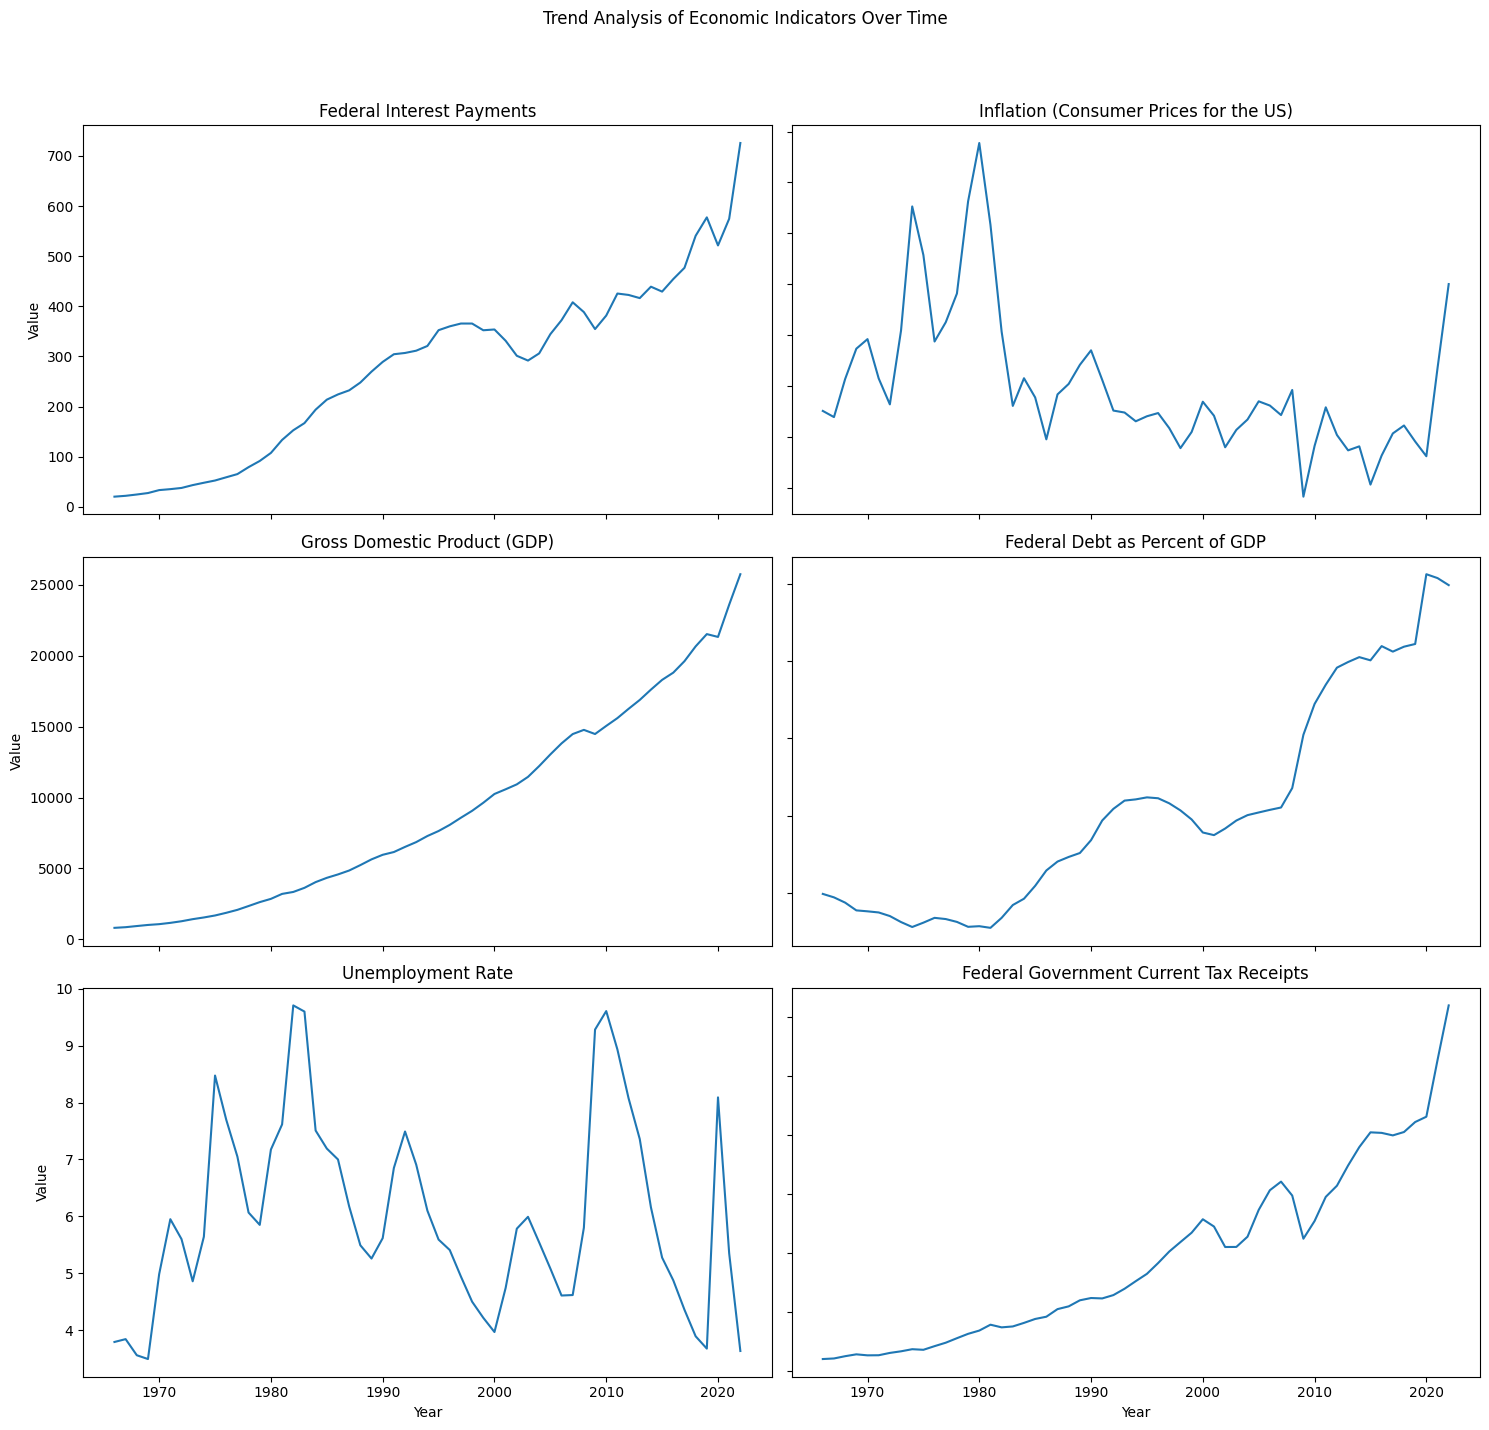

In [ ]:
import matplotlib.pyplot as plt

# Plotting trends over time for selected metrics
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Trend Analysis of Economic Indicators Over Time')

axs[0, 0].plot(data['YEAR'], data['Fed_Interest_Payments'])
axs[0, 0].set_title('Federal Interest Payments')

axs[0, 1].plot(data['YEAR'], data['Inflation_Consumer_Prices_for_the_United_States'])
axs[0, 1].set_title('Inflation (Consumer Prices for the US)')

axs[1, 0].plot(data['YEAR'], data['GDP'])
axs[1, 0].set_title('Gross Domestic Product (GDP)')

axs[1, 1].plot(data['YEAR'], data['Federal_Debt_Total_Public_Debt_as_Percent_of_GDP'])
axs[1, 1].set_title('Federal Debt as Percent of GDP')

axs[2, 0].plot(data['YEAR'], data['Unemployment_Rate'])
axs[2, 0].set_title('Unemployment Rate')

axs[2, 1].plot(data['YEAR'], data['Federal_Government_Current_Tax_Receipts'])
axs[2, 1].set_title('Federal Government Current Tax Receipts')

for ax in axs.flat:
    ax.set(xlabel='Year', ylabel='Value')
    ax.label_outer()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


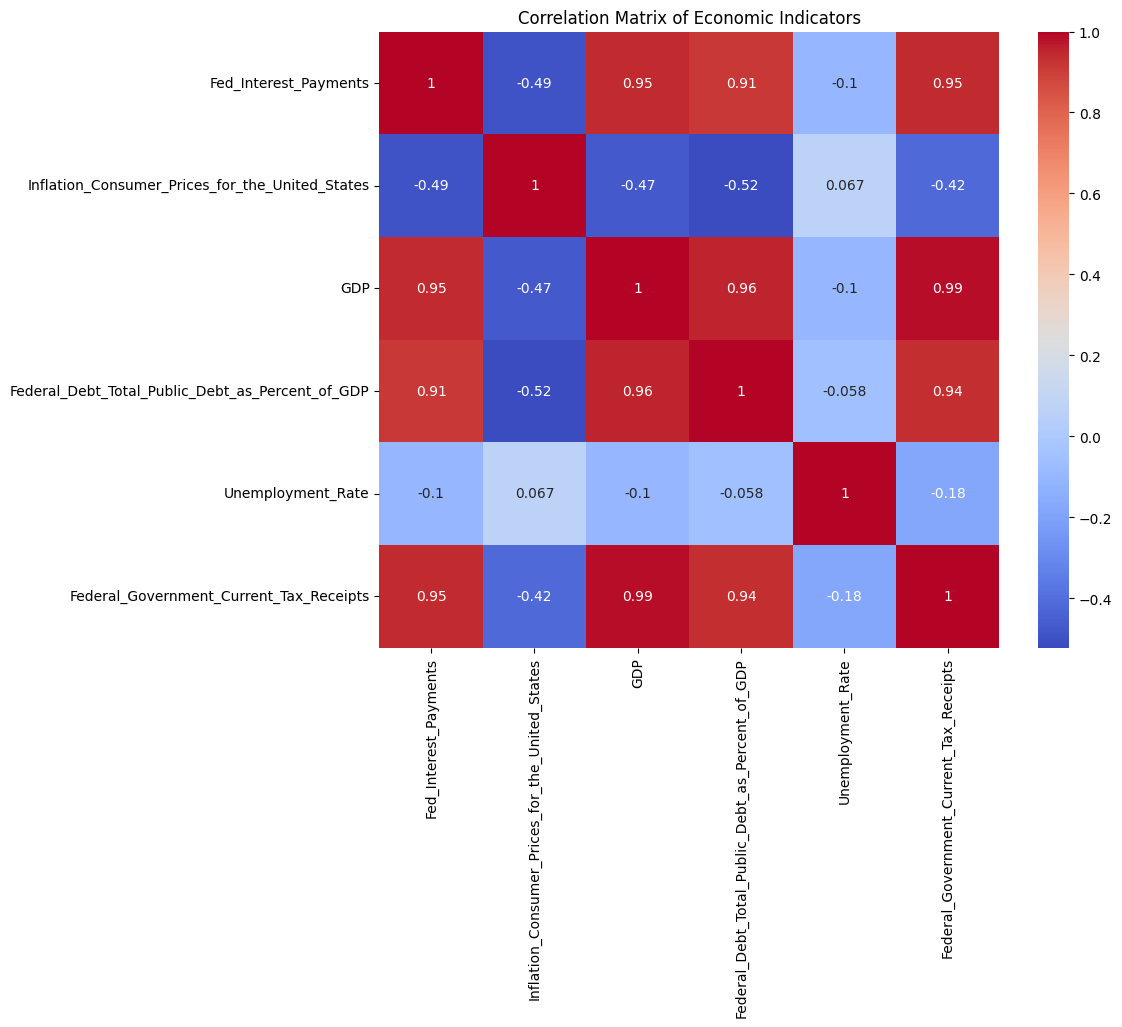

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.drop('YEAR', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Economic Indicators')
plt.show()


In [ ]:
corr_matrix

,Fed_Interest_Payments,Inflation_Consumer_Prices_for_the_United_States,GDP,Federal_Debt_Total_Public_Debt_as_Percent_of_GDP,Unemployment_Rate,Federal_Government_Current_Tax_Receipts
Fed_Interest_Payments,1.000000,-0.491992,0.945183,0.913839,-0.101859,0.946125
Inflation_Consumer_Prices_for_the_United_States,-0.491992,1.000000,-0.471771,-0.521621,0.066970,-0.420295
GDP,0.945183,-0.471771,1.000000,0.955333,-0.103746,0.987405
Federal_Debt_Total_Public_Debt_as_Percent_of_GDP,0.913839,-0.521621,0.955333,1.000000,-0.057786,0.937386
Unemployment_Rate,-0.101859,0.066970,-0.103746,-0.057786,1.000000,-0.181975
Federal_Government_Current_Tax_Receipts,0.946125,-0.420295,0.987405,0.937386,-0.181975,1.000000


**Strong Positive Correlations:**

1. Federal Interest Payments and GDP: A very strong positive correlation (0.945) suggests that as GDP increases, Federal Interest Payments also increase significantly. This indicates that higher economic output or size may lead to higher interest expenses for the federal government.

2. Federal Interest Payments and Federal Debt (as Percent of GDP): Another strong positive correlation (0.914) implies that as the federal debt relative to GDP increases, so do the interest payments. This suggests that higher debt levels are associated with higher interest costs.

3. Federal Interest Payments and Federal Government Current Tax Receipts: A very strong positive correlation (0.946) indicates that as the government's tax receipts increase, so do its interest payments. This could reflect that higher revenue collection is associated with either higher borrowing or higher interest rates.

4. GDP and Federal Government Current Tax Receipts: A near-perfect positive correlation (0.987) suggests that as GDP grows, federal tax receipts also increase markedly, indicating a direct relationship between the size of the economy and the government's revenue from taxes.

5. GDP and Federal Debt (as Percent of GDP): A strong positive correlation (0.955) indicates that as the economy grows, the federal debt relative to GDP also tends to increase, suggesting an expansion in debt levels alongside economic growth.


**Moderate to Strong Negative Correlations:**
1. Inflation (Consumer Prices for the United States) and Federal Debt (as Percent of GDP): A moderate negative correlation (-0.522) suggests that higher inflation rates are associated with lower federal debt levels relative to GDP, potentially indicating inflation's effect on reducing the real burden of debt.

2. Inflation and Federal Interest Payments: A moderate negative correlation (-0.492) indicates that higher inflation is associated with lower federal interest payments, which could reflect various macroeconomic and policy factors influencing interest rates and inflation.

**Weak Correlations:**

1. Unemployment Rate: The correlations with the unemployment rate are generally weak across all variables. For instance, its correlation with Federal Interest Payments (-0.102) and with GDP (-0.104) are both very low, suggesting that unemployment rates do not have a strong direct relationship with these economic indicators within this dataset.


2. Inflation and Federal Government Current Tax Receipts: A negative correlation (-0.420) that's weaker compared to others, suggesting a modest inverse relationship between inflation and tax receipts.


In [ ]:
descriptive_stats = data.describe()
descriptive_stats


,YEAR,Fed_Interest_Payments,Inflation_Consumer_Prices_for_the_United_States,GDP,Federal_Debt_Total_Public_Debt_as_Percent_of_GDP,Unemployment_Rate,Federal_Government_Current_Tax_Receipts
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,1994.000000,276.240978,4.023749,9038.546180,61.087958,5.998392,952.508943
std,16.598193,171.711624,2.804540,6981.356468,27.208996,1.668084,734.050367
min,1966.000000,20.264000,-0.355546,813.413750,30.885198,3.491667,103.058000
25%,1980.000000,107.529000,2.270095,2857.308500,36.801853,4.858333,344.494000
50%,1994.000000,306.022000,3.212435,7287.236500,58.717535,5.641667,763.463250
75%,2008.000000,381.487250,4.827003,14478.067250,67.138550,7.175000,1478.403500
max,2022.000000,725.687500,13.549202,25744.108250,122.603103,9.708333,3102.257500


In [ ]:
period1 = data[data['YEAR'].between(1966, 1986)]
period2 = data[data['YEAR'].between(1987, 2007)]

avg_period1 = period1[['Inflation_Consumer_Prices_for_the_United_States', 'Unemployment_Rate']].mean()
avg_period2 = period2[['Inflation_Consumer_Prices_for_the_United_States', 'Unemployment_Rate']].mean()

print(f"Average GDP and	Inflation (1966-1986):\n{avg_period1}\n")
print(f"Average GDP and Inflation (1987-2007):\n{avg_period2}")


Average GDP and	Inflation (1966-1986):
Inflation_Consumer_Prices_for_the_United_States    6.162143
Unemployment_Rate                                  6.317063
dtype: float64

Average GDP and Inflation (1987-2007):
Inflation_Consumer_Prices_for_the_United_States    3.086311
Unemployment_Rate                                  5.470635
dtype: float64


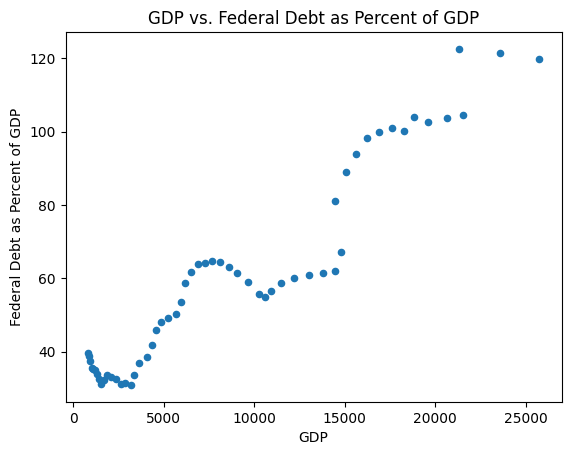

In [ ]:
data.plot(x='GDP', y='Federal_Debt_Total_Public_Debt_as_Percent_of_GDP', kind='scatter', title='GDP vs. Federal Debt as Percent of GDP')
plt.xlabel('GDP')
plt.ylabel('Federal Debt as Percent of GDP')
plt.show()


In [ ]:
import statsmodels.api as sm

In [ ]:
# Define the dependent (y) and independent variables (X)
y = data['Fed_Interest_Payments']
X = data[['Inflation_Consumer_Prices_for_the_United_States', 'GDP', 'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP', 'Unemployment_Rate', 'Federal_Government_Current_Tax_Receipts']]

In [ ]:
X = sm.add_constant(X)


In [ ]:
model = sm.OLS(y, X).fit()


In [ ]:
print(model.summary())


                              OLS Regression Results                             
Dep. Variable:     Fed_Interest_Payments   R-squared:                       0.911
Model:                               OLS   Adj. R-squared:                  0.903
Method:                    Least Squares   F-statistic:                     104.8
Date:                   Sat, 23 Mar 2024   Prob (F-statistic):           1.35e-25
Time:                           21:38:47   Log-Likelihood:                -304.64
No. Observations:                     57   AIC:                             621.3
Df Residuals:                         51   BIC:                             633.5
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

In [ ]:
# Define the dependent (y) and independent variables (X)
y1 = data['GDP']
X1 = data[['Inflation_Consumer_Prices_for_the_United_States', 'Fed_Interest_Payments', 'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP', 'Unemployment_Rate', 'Federal_Government_Current_Tax_Receipts']]

X1 = sm.add_constant(X)

model = sm.OLS(y1, X1).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GDP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.005e+30
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:42:07   Log-Likelihood:                 1317.8
No. Observations:                  57   AIC:                            -2624.
Df Residuals:                      51   BIC:                            -2611.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
df=data

In [ ]:
df['date'] = pd.to_datetime(df['YEAR'])
df.set_index('YEAR', inplace=True)

In [ ]:
df['GDP'].index.freq

AttributeError: 'Int64Index' object has no attribute 'freq'

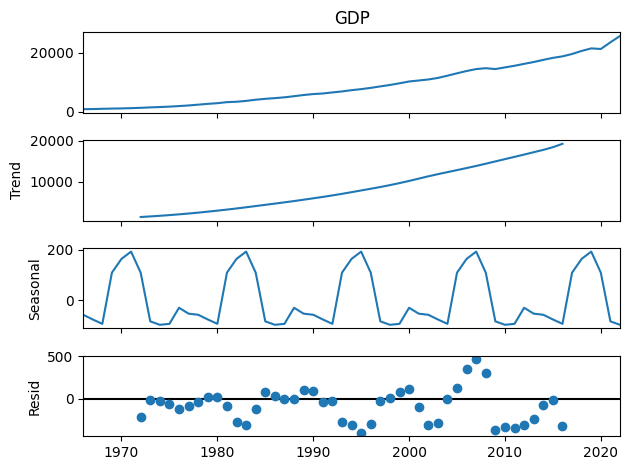

In [ ]:
decomposition = seasonal_decompose(df['GDP'], model='additive', period= 12)
fig = decomposition.plot()
plt.show()

In [ ]:
model = ARIMA(df['GDP'], order=(1,1,1))
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   57
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -410.114
Date:                Sat, 23 Mar 2024   AIC                            826.228
Time:                        21:48:16   BIC                            832.304
Sample:                             0   HQIC                           828.583
                                 - 57                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9941      0.018     54.325      0.000       0.958       1.030
ma.L1         -0.6818      0.076     -8.944      0.000      -0.831      -0.532
sigma2      1.298e+05   1.14e+04     11.369      0.0

In [ ]:
forecast = results.get_forecast(steps=5)  # Forecast the next 5 periods
forecast_summary = forecast.summary_frame()

print(forecast_summary)

GDP          mean      mean_se  mean_ci_lower  mean_ci_upper
57   27121.778916   360.225790   26415.749342   27827.808491
58   28491.324383   594.329066   27326.460819   29656.187947
59   29852.792571   833.622909   28218.921692   31486.663449
60   31206.231117  1085.797924   29078.106291   33334.355944
61   32551.687380  1352.396935   29901.038095   35202.336665


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
df.head()

,Fed_Interest_Payments,Inflation_Consumer_Prices_for_the_United_States,GDP,Federal_Debt_Total_Public_Debt_as_Percent_of_GDP,Unemployment_Rate,Federal_Government_Current_Tax_Receipts,date
YEAR,,,,,,,
1966,20.264,3.015075,813.41375,39.687075,3.791667,103.058,1970-01-01 00:00:00.000001966
1967,21.931,2.772786,859.95625,38.790127,3.841667,107.917,1970-01-01 00:00:00.000001967
1968,24.552,4.271796,940.64650,37.421898,3.558333,127.217,1970-01-01 00:00:00.000001968
1969,27.464,5.462386,1017.61500,35.414700,3.491667,142.951,1970-01-01 00:00:00.000001969
1970,33.330,5.838255,1073.31050,35.169367,4.983333,134.430,1970-01-01 00:00:00.000001970


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
df.columns

Index(['Fed_Interest_Payments',
       'Inflation_Consumer_Prices_for_the_United_States', 'GDP',
       'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP', 'Unemployment_Rate',
       'Federal_Government_Current_Tax_Receipts', 'date'],
      dtype='object')

In [ ]:
df.dtypes

Fed_Interest_Payments                                      float64
Inflation_Consumer_Prices_for_the_United_States            float64
GDP                                                        float64
Federal_Debt_Total_Public_Debt_as_Percent_of_GDP           float64
Unemployment_Rate                                          float64
Federal_Government_Current_Tax_Receipts                    float64
date                                                datetime64[ns]
dtype: object

In [93]:
df1 = pd.read_csv('s&P.csv')

In [94]:
df1.head()

,YEAR,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change
0,2024,"4,975.80","4,742.83","5,241.53","4,688.68","5,234.18",9.74%
1,2023,"4,283.73","3,824.14","4,783.35","3,808.10","4,769.83",24.23%
2,2022,"4,097.49","4,796.56","4,796.56","3,577.03","3,839.50",-19.44%
3,2021,"4,273.41","3,700.65","4,793.06","3,700.65","4,766.18",26.89%
4,2020,"3,217.86","3,257.85","3,756.07","2,237.40","3,756.07",16.26%


In [95]:
df1.columns

Index(['YEAR', 'Average Closing Price', 'Year Open', 'Year High', 'Year Low',
       'Year Close', 'Annual % Change'],
      dtype='object')

In [97]:
merged_df = pd.merge(df1, df, on='YEAR', how='inner')

In [99]:
merged_df.head()

,YEAR,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change,Fed_Interest_Payments,Inflation_Consumer_Prices_for_the_United_States,GDP,Federal_Debt_Total_Public_Debt_as_Percent_of_GDP,Unemployment_Rate,Federal_Government_Current_Tax_Receipts,date
0,2022,"4,097.49","4,796.56","4,796.56","3,577.03","3,839.50",-19.44%,725.68750,8.002800,25744.10825,119.772345,3.633333,3102.25750,1970-01-01 00:00:00.000002022
1,2021,"4,273.41","3,700.65","4,793.06","3,700.65","4,766.18",26.89%,574.57050,4.697859,23594.03075,121.599000,5.350000,2638.87975,1970-01-01 00:00:00.000002021
2,2020,"3,217.86","3,257.85","3,756.07","2,237.40","3,756.07",16.26%,521.38700,1.233584,21322.94950,122.603103,8.091667,2158.24675,1970-01-01 00:00:00.000002020
3,2019,"2,913.36","2,510.03","3,240.02","2,447.89","3,230.78",28.88%,577.36400,1.812210,21521.39500,104.504752,3.675000,2113.19375,1970-01-01 00:00:00.000002019
4,2018,"2,746.21","2,695.81","2,930.75","2,351.10","2,506.85",-6.24%,540.62925,2.442583,20656.51550,103.806592,3.891667,2028.43875,1970-01-01 00:00:00.000002018


In [116]:
cols_to_convert = ['Average Closing Price', 'Year Open', 'Year High', 'Year Low', 'Year Close', 'Annual % Change']

for col in cols_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col].str.replace(',', '').replace('%','', regex=True), errors='coerce')

AttributeError: Can only use .str accessor with string values!

<ipython-input-113-4589da483a1d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


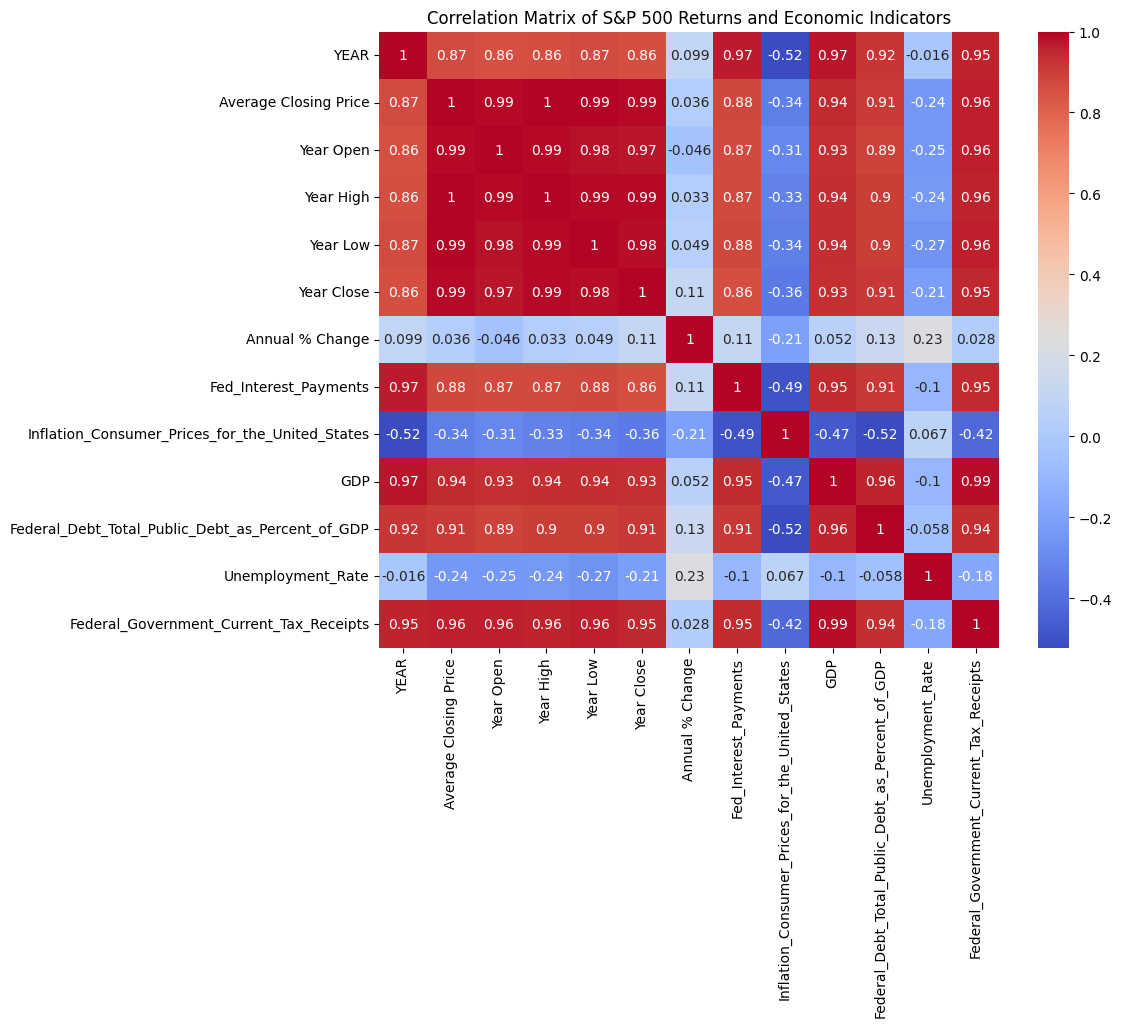

In [113]:
correlation_matrix = merged_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of S&P 500 Returns and Economic Indicators')
plt.show()

In [114]:
correlation_matrix

,YEAR,Average Closing Price,Year Open,Year High,Year Low,Year Close,Annual % Change,Fed_Interest_Payments,Inflation_Consumer_Prices_for_the_United_States,GDP,Federal_Debt_Total_Public_Debt_as_Percent_of_GDP,Unemployment_Rate,Federal_Government_Current_Tax_Receipts
YEAR,1.000000,0.867370,0.855053,0.859718,0.865337,0.860226,0.098679,0.965089,-0.517827,0.974049,0.920101,-0.015877,0.953253
Average Closing Price,0.867370,1.000000,0.989629,0.998757,0.994094,0.992861,0.036372,0.876521,-0.341715,0.941837,0.909528,-0.244411,0.962514
Year Open,0.855053,0.989629,1.000000,0.991749,0.981020,0.970574,-0.045710,0.871696,-0.309907,0.933517,0.892419,-0.246588,0.959655
Year High,0.859718,0.998757,0.991749,1.000000,0.989646,0.991858,0.032564,0.872675,-0.329429,0.935918,0.903811,-0.238118,0.957517
Year Low,0.865337,0.994094,0.981020,0.989646,1.000000,0.984996,0.048748,0.876275,-0.337415,0.938856,0.903514,-0.268247,0.963983
Year Close,0.860226,0.992861,0.970574,0.991858,0.984996,1.000000,0.113224,0.862732,-0.358994,0.931490,0.911905,-0.214083,0.947259
Annual % Change,0.098679,0.036372,-0.045710,0.032564,0.048748,0.113224,1.000000,0.109833,-0.207747,0.052227,0.130999,0.226134,0.028396
Fed_Interest_Payments,0.965089,0.876521,0.871696,0.872675,0.876275,0.862732,0.109833,1.000000,-0.491992,0.945183,0.913839,-0.101859,0.946125
Inflation_Consumer_Prices_for_the_United_States,-0.517827,-0.341715,-0.309907,-0.329429,-0.337415,-0.358994,-0.207747,-0.491992,1.000000,-0.471771,-0.521621,0.066970,-0.420295
GDP,0.974049,0.941837,0.933517,0.935918,0.938856,0.931490,0.052227,0.945183,-0.471771,1.000000,0.955333,-0.103746,0.987405


# **S&P 500 Market Performance Indicators:**
**Strong Positive Correlations within S&P 500 Data:** The S&P 500 indicators (Average Closing Price, Year Open, Year High, Year Low, Year Close) are very strongly correlated with each other, with correlation coefficients ranging from 0.97 to 0.99. This is expected as these indicators are all directly related to market performance in a given year.

**Moderate to Strong Correlation with GDP and Federal Government Current Tax Receipts:** These market indicators also show a strong positive correlation with GDP and Federal Government Current Tax Receipts, with coefficients above 0.90 in many cases. This suggests that better economic conditions (higher GDP) and higher tax receipts are associated with higher market valuations.

# **Economic Indicators:**

**GDP, Federal Debt, and Tax Receipts:** GDP shows very strong positive correlations with Federal Debt as a Percent of GDP (0.955) and Federal Government Current Tax Receipts (0.987), indicating that as the economy grows, both public debt and tax receipts tend to increase.

**Inflation and Market Performance:** Inflation shows a moderate negative correlation with most S&P 500 performance indicators, suggesting that higher inflation may be associated with lower market valuations. This might reflect inflation's potential to erode real investment returns, though the relationship is complex and influenced by various factors.

**Unemployment Rate:** The unemployment rate has a weak negative correlation with most S&P 500 indicators and a weak positive correlation with the Annual % Change of the S&P 500. This suggests a slight tendency for the stock market to perform better when unemployment is lower, though the relationship isn't very strong.

# **Notable Observations:**
**Fed Interest Payments:** This shows a very strong positive correlation with YEAR, suggesting that over time, there has been an increase in Fed Interest Payments. It also correlates strongly with GDP and Federal Government Current Tax Receipts, indicating that as the economy grows, so does the amount paid by the government in interest.

**Annual % Change of the S&P 500: **Interestingly, this has very weak correlations with almost all economic indicators, including a very low positive correlation with GDP (0.052) and a slight positive correlation with the unemployment rate (0.226). This suggests that the annual performance of the S&P 500 might not be directly predictable by these macroeconomic indicators, highlighting the influence of numerous other factors on stock market returns.

In [102]:
merged_df.columns

Index(['YEAR', 'Average Closing Price', 'Year Open', 'Year High', 'Year Low',
       'Year Close', 'Annual % Change', 'Fed_Interest_Payments',
       'Inflation_Consumer_Prices_for_the_United_States', 'GDP',
       'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP', 'Unemployment_Rate',
       'Federal_Government_Current_Tax_Receipts', 'date'],
      dtype='object')

In [103]:
columns_of_interest = [
    'Annual % Change',
    'Fed_Interest_Payments',
    'Inflation_Consumer_Prices_for_the_United_States',
    'GDP',
    'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP',
    'Unemployment_Rate',
    'Federal_Government_Current_Tax_Receipts'
]


In [110]:
analysis_df = merged_df[columns_of_interest]

In [111]:
correlation_matrix = analysis_df.corr()

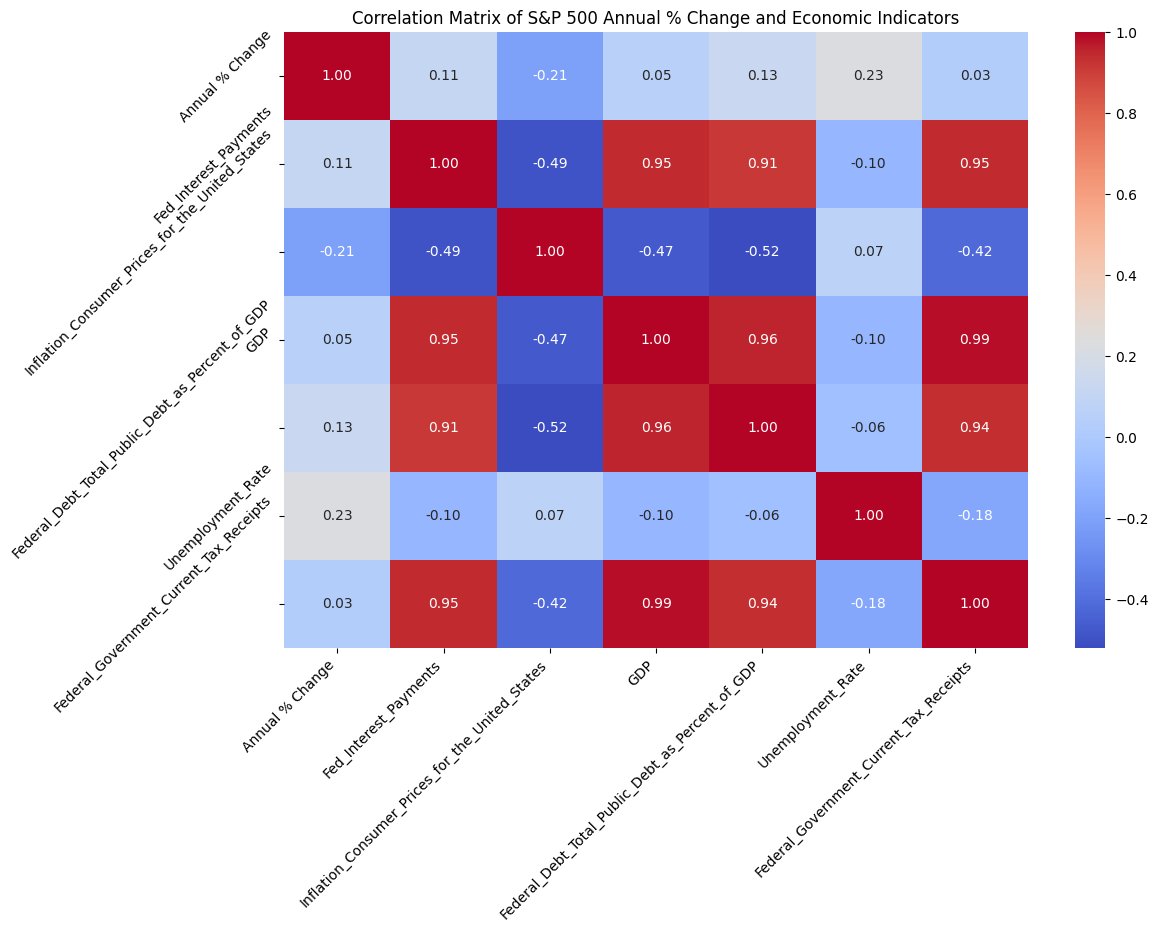

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of S&P 500 Annual % Change and Economic Indicators')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.show()

In [107]:
merged_df.dtypes

YEAR                                                         int64
Average Closing Price                                       object
Year Open                                                   object
Year High                                                   object
Year Low                                                    object
Year Close                                                  object
Annual % Change                                             object
Fed_Interest_Payments                                      float64
Inflation_Consumer_Prices_for_the_United_States            float64
GDP                                                        float64
Federal_Debt_Total_Public_Debt_as_Percent_of_GDP           float64
Unemployment_Rate                                          float64
Federal_Government_Current_Tax_Receipts                    float64
date                                                datetime64[ns]
dtype: object

In [117]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [118]:
features = ['Average Closing Price', 'Year Open', 'Year High', 'Year Low', 'Year Close',
            'Annual % Change', 'Fed_Interest_Payments',
            'Inflation_Consumer_Prices_for_the_United_States', 'GDP',
            'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP', 'Unemployment_Rate',
            'Federal_Government_Current_Tax_Receipts']


In [119]:
X = StandardScaler().fit_transform(merged_df[features])

In [120]:
pca = PCA(n_components=2)  #reduce to 2 dimensions
principalComponents = pca.fit_transform(X)

In [121]:
principalDf = pd.DataFrame(data=principalComponents, columns=['Principal Component 1', 'Principal Component 2'])


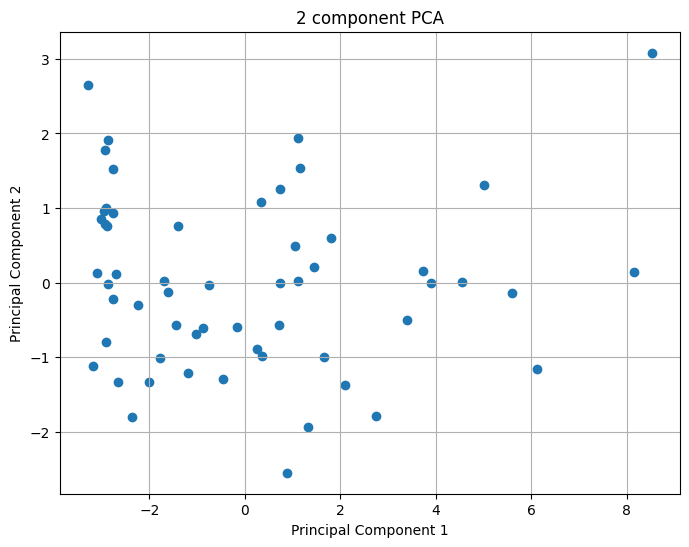

In [122]:
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['Principal Component 1'], principalDf['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')
plt.grid(True)
plt.show()

In [123]:
print(f"Explained variance by component: {pca.explained_variance_ratio_}")


Explained variance by component: [0.73082979 0.11215185]


In [124]:
data1 = merged_df[['Annual % Change', 'Inflation_Consumer_Prices_for_the_United_States']]


In [125]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data1)

In [126]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)

In [127]:
principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])

In [128]:
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [0.60387343 0.39612657]


In [129]:
import statsmodels.api as sm


In [130]:
X = merged_df[['Fed_Interest_Payments', 'Inflation_Consumer_Prices_for_the_United_States', 'GDP', 'Federal_Debt_Total_Public_Debt_as_Percent_of_GDP', 'Unemployment_Rate', 'Federal_Government_Current_Tax_Receipts']]
y = merged_df['Annual % Change']

In [131]:
X = sm.add_constant(X)

In [132]:
model = sm.OLS(y, X).fit()

In [133]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Annual % Change   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.581
Date:                Sat, 23 Mar 2024   Prob (F-statistic):              0.172
Time:                        22:41:16   Log-Likelihood:                -235.84
No. Observations:                  57   AIC:                             485.7
Df Residuals:                      50   BIC:                             500.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

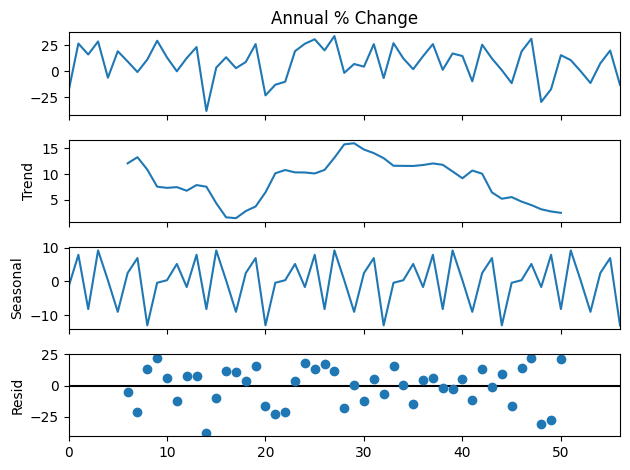

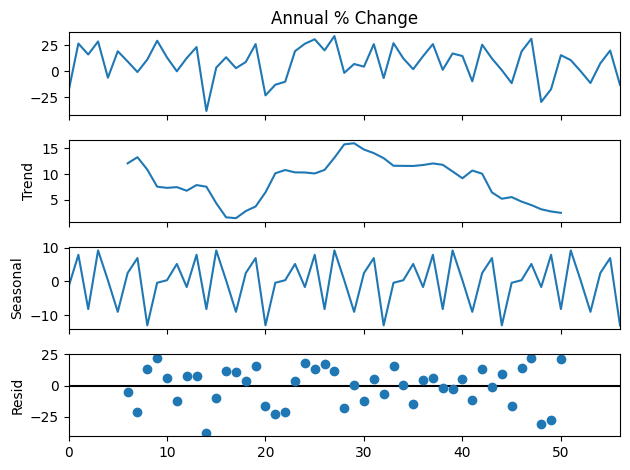

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose
annual_returns_decomposed = seasonal_decompose(merged_df['Annual % Change'], model='additive', period=12)
annual_returns_decomposed.plot()

In [140]:
from statsmodels.tsa.stattools import grangercausalitytests
granger_test_result = grangercausalitytests(merged_df[['Annual % Change', 'GDP']], maxlag=[1, 2], verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.2084  , p=0.2766  , df_denom=53, df_num=1
ssr based chi2 test:   chi2=1.2768  , p=0.2585  , df=1
likelihood ratio test: chi2=1.2625  , p=0.2612  , df=1
parameter F test:         F=1.2084  , p=0.2766  , df_denom=53, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5811  , p=0.2159  , df_denom=50, df_num=2
ssr based chi2 test:   chi2=3.4784  , p=0.1757  , df=2
likelihood ratio test: chi2=3.3729  , p=0.1852  , df=2
parameter F test:         F=1.5811  , p=0.2159  , df_denom=50, df_num=2


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


<Axes: title={'center': 'Rolling Correlation Between Annual % Change and GDP'}>

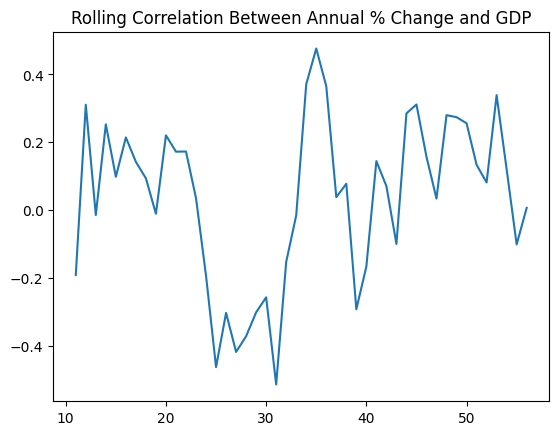

In [141]:
rolling_corr = merged_df['Annual % Change'].rolling(window=12).corr(merged_df['GDP'])
rolling_corr.plot(title='Rolling Correlation Between Annual % Change and GDP')